In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer, SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.decomposition import PCA

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns

## The Best EDA Uses A Model!

In [4]:
df = pd.read_csv("data/cleaned_df.csv", index_col=["UnitID"])

In [5]:
df = df.round(3)

In [6]:
df.columns[-1]

'Graduation rate  Black  non-Hispanic (DRVGR2019)'

In [7]:
revenues_df = df.iloc[:,1:7] #Revenues as Principle component

In [8]:
revenues_df.head()

,Tuition_And_Fees,Government_Grants,Private_Gifts,Investment_Return,Sales_And_Services,Other_Revenues
UnitID,,,,,,
180203.0,2.0,60.0,7.0,1.0,0.0,29.0
138558.0,17.0,17.0,2.0,0.0,0.0,28.0
126182.0,34.0,51.0,5.0,1.0,0.0,9.0
100654.0,33.0,30.0,2.0,0.0,0.0,6.0
100724.0,30.0,25.0,2.0,1.0,0.0,7.0


In [9]:
expenses_df = df.iloc[:,8:15] #Expenses as Principle component

In [10]:
expenses_df.head()

,Instruction_Expenses,Research_Expenses,Public_Service_Expenses,Academic_Support_Expenses,Student_Service_Expenses,Institutional_Support_Expenses,Other_Core_Expenses
UnitID,,,,,,,
180203.0,29.0,3.0,7.0,3.0,8.0,16.0,36.0
138558.0,42.0,0.0,3.0,15.0,9.0,19.0,13.0
126182.0,53.0,0.0,3.0,7.0,18.0,15.0,5.0
100654.0,22.0,9.0,9.0,6.0,14.0,11.0,29.0
100724.0,29.0,3.0,4.0,9.0,12.0,27.0,16.0


In [11]:
staff_diversity = df.iloc[:,16:27] #add feature: staff diversity distribution score

In [12]:
staff_diversity.head() #from data wrangling all staff columns were converted into percentages fo the total staff

,Grand total men (S2019_IS All instructional staff),Grand total women (S2019_IS All instructional staff),American Indian or Alaska Native total (S2019_IS All instructional staff),Asian total (S2019_IS All instructional staff),Black or African American total (S2019_IS All instructional staff),Hispanic or Latino total (S2019_IS All instructional staff),Native Hawaiian or Other Pacific Islander total (S2019_IS All instructional staff),White total (S2019_IS All instructional staff),Two or more races total (S2019_IS All instructional staff),Race/ethnicity unknown total (S2019_IS All instructional staff),Nonresident alien total (S2019_IS All instructional staff)
UnitID,,,,,,,,,,,
180203.0,53.85,46.15,61.54,0.00,0.00,0.00,0.00,38.46,0.00,0.00,0.00
138558.0,51.68,48.32,0.00,6.71,6.71,2.01,0.00,83.22,0.00,0.67,0.67
126182.0,44.66,55.34,0.00,0.97,0.97,16.50,1.94,76.70,0.00,2.91,0.00
100654.0,54.13,45.87,0.41,10.33,66.94,0.00,0.00,14.05,0.83,0.00,7.44
100724.0,50.44,49.56,0.00,12.83,61.06,1.33,0.00,22.57,0.00,2.21,0.00


In [13]:
enrollment_diversity = df.iloc[:,29:40] #Enrollment distribution

In [14]:
enrollment_diversity.head()

,Percent of total enrollment that are American Indian or Alaska Native (DRVEF2013_RV),Percent of total enrollment that are Asian/Native Hawaiian/Pacific Islander (DRVEF2013_RV),Percent of total enrollment that are Asian (DRVEF2013_RV),Percent of total enrollment that are Native Hawaiian or Other Pacific Islander (DRVEF2013_RV),Percent of total enrollment that are Black or African American (DRVEF2013_RV),Percent of total enrollment that are Hispanic/Latino (DRVEF2013_RV),Percent of total enrollment that are White (DRVEF2013_RV),Percent of total enrollment that are Race/ethnicity unknown (DRVEF2013_RV),Percent of total enrollment that are Nonresident Alien (DRVEF2013_RV),Percent of total enrollment that are two or more races (DRVEF2013_RV),Percent of total enrollment that are women (DRVEF2013_RV)
UnitID,,,,,,,,,,,
180203.0,88.0,0.0,0.0,0.0,0.0,1.0,10.0,0.0,0.0,0.0,57.0
138558.0,0.0,1.0,1.0,0.0,12.0,6.0,78.0,0.0,2.0,1.0,54.0
126182.0,1.0,2.0,1.0,0.0,7.0,26.0,56.0,5.0,0.0,3.0,56.0
100654.0,0.0,1.0,1.0,0.0,92.0,1.0,5.0,1.0,0.0,0.0,55.0
100724.0,0.0,0.0,0.0,0.0,91.0,1.0,3.0,1.0,2.0,1.0,61.0


In [15]:
x = df.loc[:,:].drop([df.columns[-1], df.columns[-2]], axis=1)
y = df.loc[:,df.columns[-2]]

# Principle Components For Baseline Model

<ol>
    <li>Revenues Principle component</li>
    <li>Expenses Principle component</li>
    <li>Staff Diversity Principle component</li>
    <li>Enrollment Diversity Principle component</li>
</ol>    

In [16]:
pca = PCA(n_components=1)

In [17]:
x["Revenues_Component"] = pca.fit_transform(revenues_df)

In [18]:
x["Expenses_Component"] = pca.fit_transform(expenses_df)

In [19]:
x["Staff_Diversity_Component"] = pca.fit_transform(staff_diversity)

In [20]:
x["Enrollment_Diversity_Component"] = pca.fit_transform(enrollment_diversity)

In [21]:
x.drop(revenues_df.columns, axis=1, inplace=True)

In [22]:
x.drop(expenses_df.columns, axis = 1, inplace=True)

In [23]:
x.drop(enrollment_diversity.columns, axis=1, inplace=True)

In [24]:
x.drop(staff_diversity.columns, axis=1, inplace=True)

In [25]:
x.shape

(2315, 154)

# initial Modeling

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.15, random_state=42)

In [27]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    #("variance", VarianceThreshold(threshold=0.25)),
    ("classifier", Lasso(alpha=0.1))   
])

In [28]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', Lasso(alpha=0.1))])

In [29]:
y_pred = pipeline.predict(x_test)

In [30]:
mean_squared_error(y_test, y_pred)

213.1907686285073

In [31]:
np.sqrt(213) # on average 14 percent off which is not bad but not good

14.594519519326424

In [263]:
#visualizing a few of the coeficients
start = 50
stop = 60
names = list(x.columns)
lasso_coef = np.abs(pipeline.named_steps['classifier'].coef_)
_ = plt.plot(range(10), lasso_coef[start:stop])
_ = plt.xticks(range(10), names[start:stop], rotation=90)
_ = plt.ylabel("Coeficients")
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [33]:
#grabbing indices of important features

def get_important(thresh):
    important_features = []
    for i,v in enumerate(lasso_coef):
        if v > thresh:
            important_features.append(i)
    return important_features
features = get_important(0)

highly_important = get_important(1)

In [262]:
len(features)

117

### Lets Create Some Helpful Bootstrapping functions

In [177]:
def bs_sample(arr):
    return np.random.choice(arr, size=len(arr))

In [179]:
def bs_replicate(arr, func, n):
    replicates_list = []
    
    for i in range(n):
        sample = bs_sample(arr)
        replicate = func(sample)
        replicates_list.append(replicate)
    
    return replicates_list

In [180]:
def permutation_sample(arr1, arr2):
    size = len(arr1)
    
    data = np.concatenate((arr1, arr2))

    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:size]
    perm_sample_2 = permuted_data[size:]

    return perm_sample_1, perm_sample_2

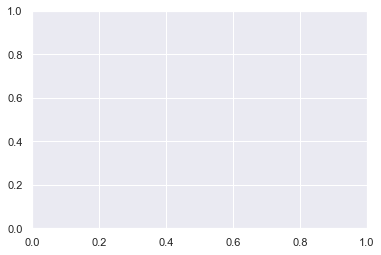

In [200]:
#plot n ecdfs of the data if they were being drawn from the same distribution, 
#then plot the actual ecdfs of the raw data
def plot_permutations(arr1, arr2, n, label1="arr 1", label2="arr 2", ax=plt.gca()):
    
    for i in range(n):
        perm_1, perm_2 = permutation_sample(arr1, arr2)
        _ = sns.ecdfplot(x=perm_1, color="gray", alpha=0.7, ax=ax)
        _ = sns.ecdfplot(x=perm_2, color="gray", alpha=0.7, ax=ax)
 
    _ = sns.ecdfplot(x=arr1, label=label1, ax=ax)
    _ = sns.ecdfplot(x=arr2, label = label2, ax=ax)


In [203]:
def diff_of_means(data_1, data_2):
    return data_1.mean() - data_2.mean()

In [211]:
def diff_of_std(data1, data_2):
    return data_1.std() - data_2.std()

In [222]:
def sample_replicate(arr1, arr2, func, n):
    replicate_samples = np.empty(n)
    
    for i in range(n):
        perm1, perm2 = permutation_sample(arr1, arr2)
    
        replicate = func(perm1, perm2)
        replicate_samples[i] = replicate
    return replicate_samples

In [229]:
def get_p(replicate_array, empiricle_value, tailed2):
    if tailed2:
        return 2 * np.sum(replicate_array >= empiricle_value) / len(replicate_array)
    return np.sum(replicate_array >= empiricle_value) / len(replicate_array)    

# Lets Now Explore our Highly Important Features

In [34]:
highly_important_df = x.iloc[:,highly_important]

In [35]:
y_reset = y.reset_index()

In [36]:
highly_important_df.reset_index(inplace=True)

In [37]:
highly_important_df = highly_important_df.merge(y_reset, how="outer", on="UnitID")

In [38]:
highly_important_df.set_index("UnitID", inplace=True)

In [39]:
names = list(highly_important_df.columns)

In [40]:
names

['Percent of full-time first-time undergraduates awarded federal  state  local or institutional grant aid (SFA1819)',
 'Grand total (EF2013B_RV  Undergraduate  Age under 25 total)',
 'Total women (EF2013B_RV  Undergraduate  Age under 25 total)',
 'Total women (EF2013B_RV  Undergraduate  Age 25 and over total)',
 'Total price for out-of-state students living on campus 2012-13 (DRVIC2012_RV)',
 'SAT Math 75th percentile score (IC2012_RV)',
 'ACT Composite 75th percentile score (IC2012_RV)',
 "Carnegie Classification 2018: Basic (HD2018)_Baccalaureate/Associate's Colleges: Associate's Dominant",
 "Carnegie Classification 2018: Basic (HD2018)_Baccalaureate/Associate's Colleges: Mixed Baccalaureate/Associate's",
 'Carnegie Classification 2018: Basic (HD2018)_Doctoral Universities: Very High Research Activity\r\n',
 'Carnegie Classification 2018: Basic (HD2018)_Special Focus Four-Year: Other Health Professions Schools',
 'Carnegie Classification 2018: Basic (HD2018)_Tribal Colleges',
 'Carne

### Grant Aid

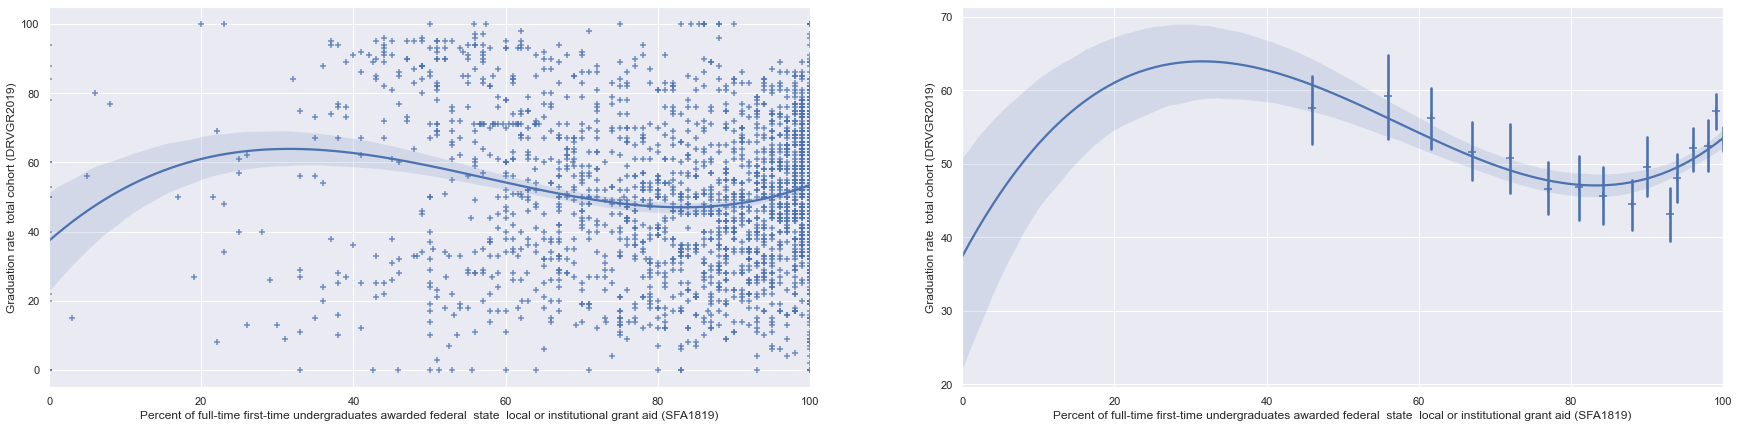

In [94]:
sns.set_theme()
fig, ax = plt.subplots(1,2,figsize=(30,7))
_ = sns.regplot(data=highly_important_df, x=names[0], y=names[-1], marker="+", ax=ax[0], order=3)


_ = sns.regplot(data=highly_important_df, x=names[0], y=names[-1], marker="+", x_bins=20, ax= ax[1], order=3)

plt.show()

### SAT and ACT Scores

In [42]:
#show imputed ACT Scores as a different color

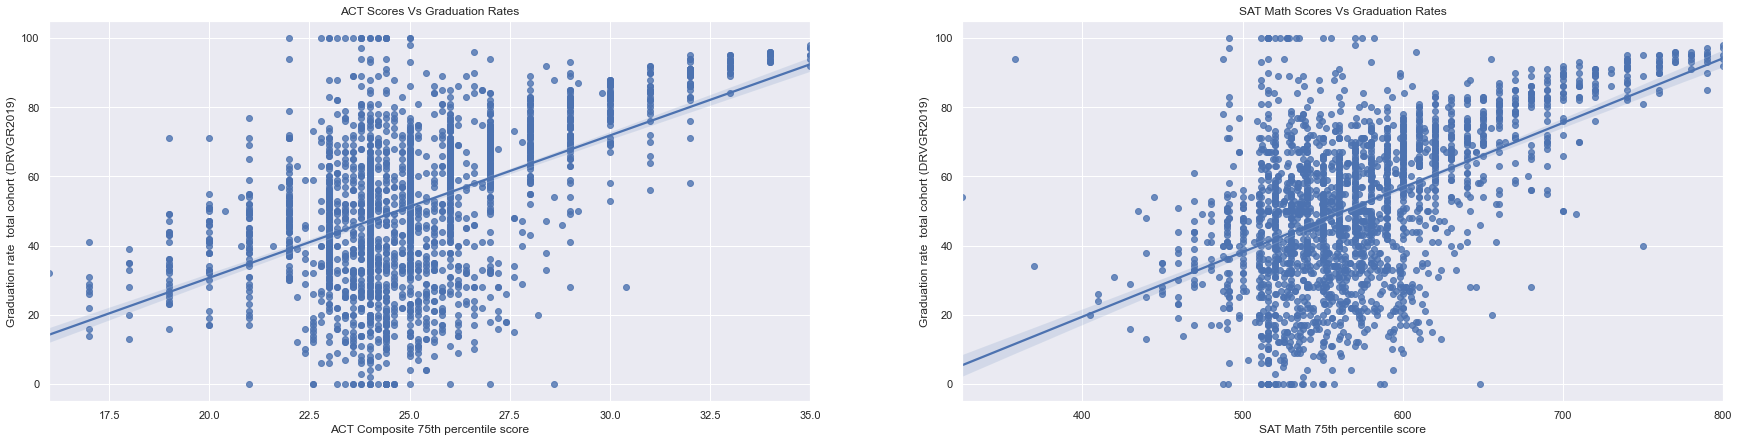

In [43]:
sns.set_theme()
fig, ax = plt.subplots(1,2, figsize=(30,7))
_ = sns.regplot(data=highly_important_df, x=names[6], y=names[-1], ax=ax[0])
ax[0].set_title("ACT Scores Vs Graduation Rates")
ax[0].set_xlabel("ACT Composite 75th percentile score")

_ = sns.regplot(data=highly_important_df, x=names[5], y=names[-1], ax=ax[1])
ax[1].set_title("SAT Math Scores Vs Graduation Rates")
ax[1].set_xlabel("SAT Math 75th percentile score")
plt.show()

#### View Imputed SAT Scores vs Non-Imputes

## Price 

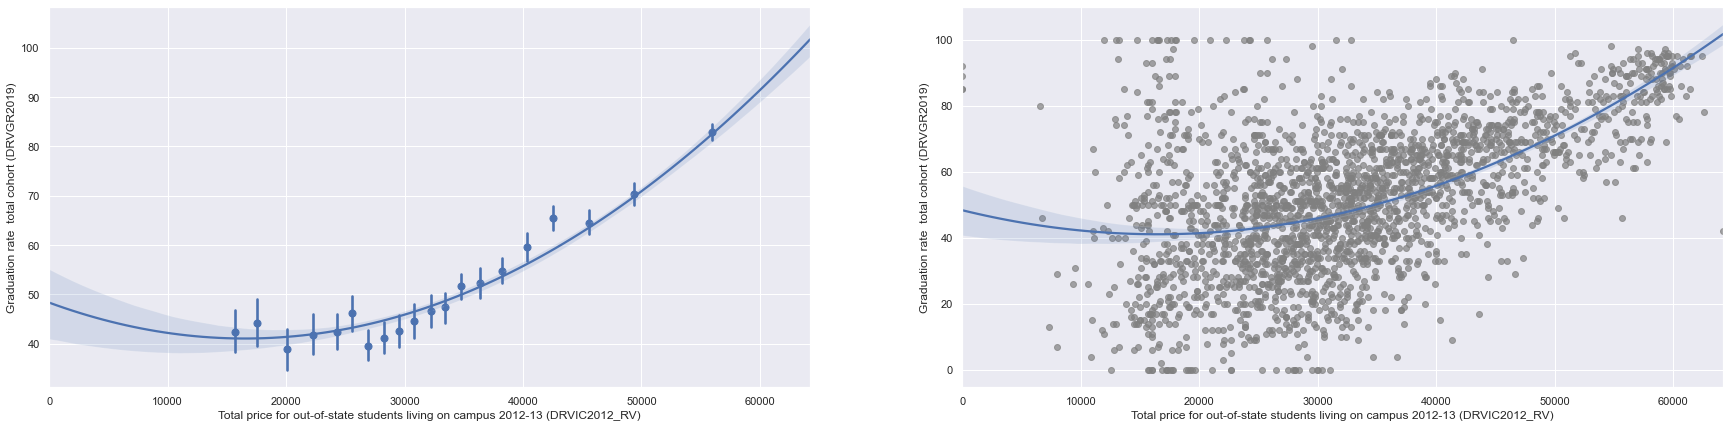

In [252]:
fig, ax = plt.subplots(1,2, figsize=(30,7))
_ = sns.regplot(
    data=highly_important_df, x=names[4], 
    y=names[-1], x_bins=20, ax=ax[0], order=2,
)



_ = sns.regplot(
    data=highly_important_df, x=names[4], 
    y=names[-1], ax=ax[1], order=2,
    scatter_kws={
        "color": "gray", "alpha": 0.7
    }
)


## AGE

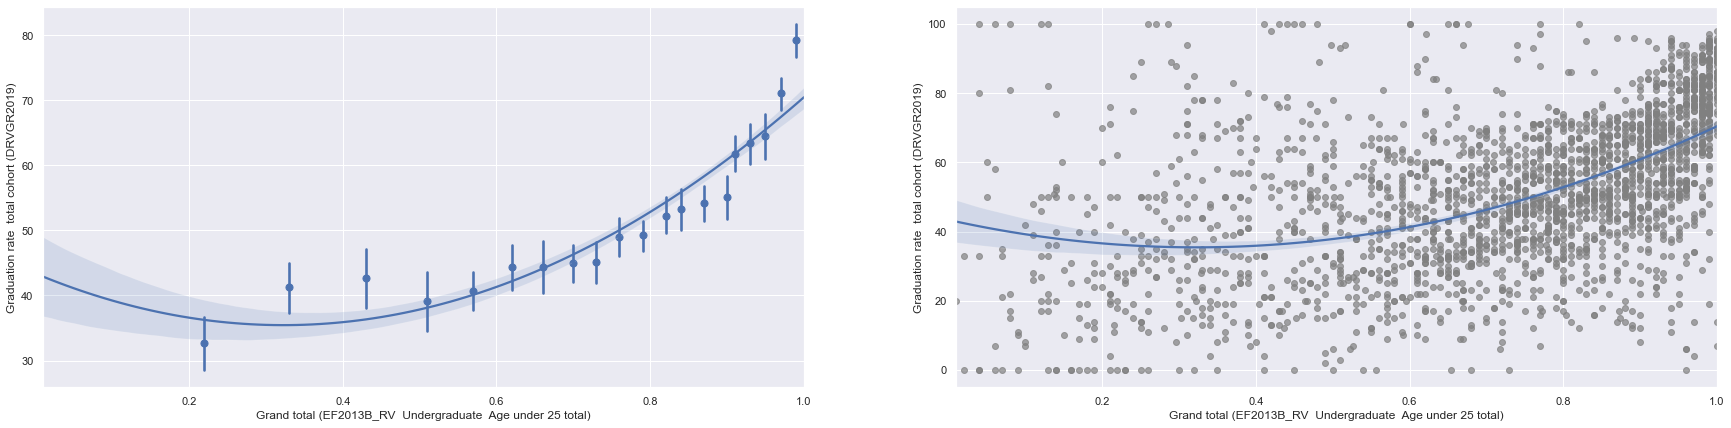

In [254]:
fig, ax = plt.subplots(1,2, figsize=(30,7))
_ = sns.regplot(
    data=highly_important_df, x=names[1], 
    y=names[-1], x_bins=20, ax=ax[0], order=2,
)



_ = sns.regplot(
    data=highly_important_df, x=names[1], 
    y=names[-1], ax=ax[1], order=2,
    scatter_kws={
        "color": "gray", "alpha": 0.7
    }
)


### Staff Diversity

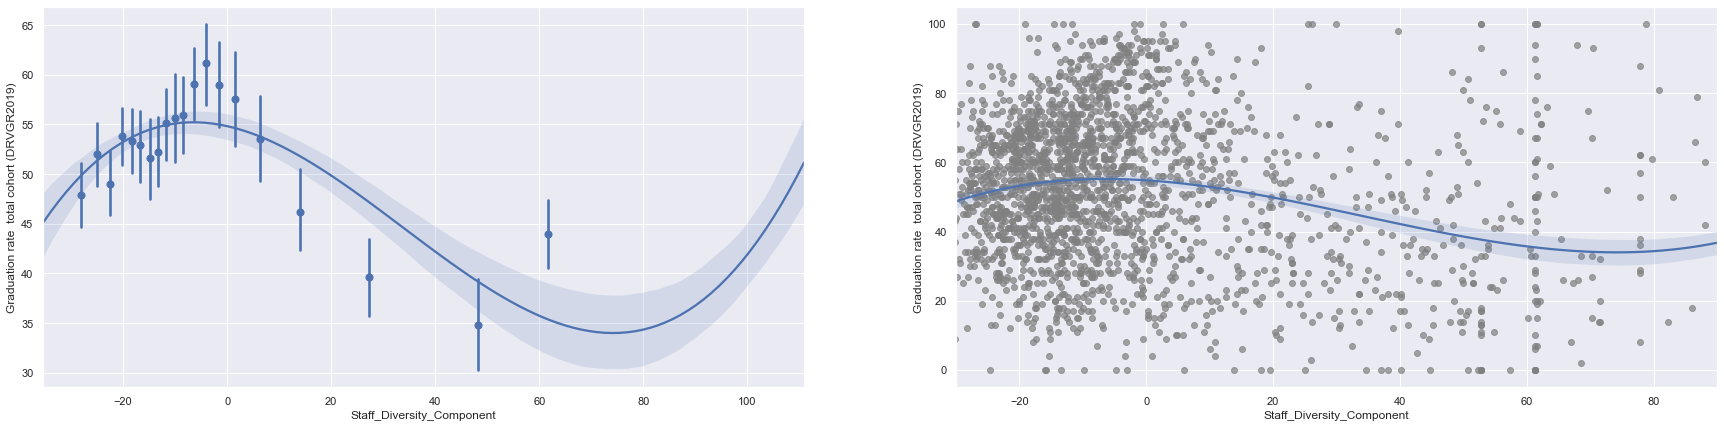

In [133]:
sns.set_theme()
fig, ax = plt.subplots(1,2, figsize=(30,7))
_ = sns.regplot(
    data=highly_important_df, x=names[-2], 
    y=names[-1], x_bins=20, ax=ax[0], order=3,
)
plt.xlim([-30, 90])

_ = sns.regplot(
    data=highly_important_df, x=names[-2], 
    y=names[-1], ax=ax[1], order=3,
    scatter_kws={
        "color": "gray", "alpha": 0.7
    }
)


plt.show()

In [ ]:
# Bins use a bootstrap confidence interval

### Expenses

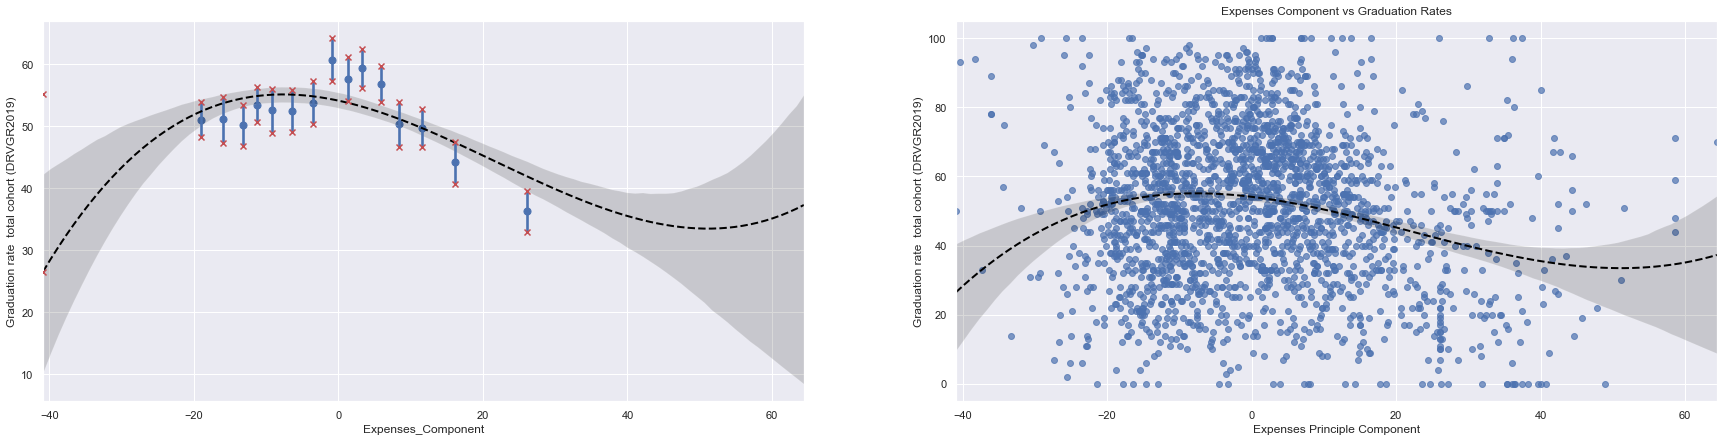

In [304]:
fig, ax = plt.subplots(1, 2, figsize=(30,7))

_ = sns.regplot(
    data=highly_important_df, x=names[-3], 
    y=names[-1], x_bins=15, order=3, ax=ax[0], 
    line_kws = {
        "lw": 2, "color": "black", "linestyle": "--"
    },
)

_ = sns.regplot(
    data=highly_important_df, x=names[-3],
    y=names[-1], order=3, ax=ax[1],
    
    line_kws = {
        "lw": 2, "color": "black", "linestyle": "--"
    },
    
    scatter_kws={
        "color": "b", "alpha": 0.7
    }
)

plt.title("Expenses Component vs Graduation Rates")
plt.xlabel("Expenses Principle Component")


lower = [line.get_ydata().min() for line in ax[0].lines]
upper = [line.get_ydata().max() for line in ax[0].lines]

bin_list = [i[0] for i in [line.get_xdata() for line in ax[0].lines][:16]]

ax[0].scatter(bin_list, lower, marker='x', color='C3', zorder=3)
ax[0].scatter(bin_list, upper, marker='x', color='C3', zorder=3)

means = ax[0].collections[0].get_offsets()[:, 1]
collections = ax[0].collections
plt.show()

In [306]:
bin_list

[-19.091078634403583,
 -16.000135535744878,
 -13.236271258920187,
 -11.298940224836635,
 -9.200079125065551,
 -6.433652701629274,
 -3.466305077307929,
 -0.9097348189338041,
 1.3109095301761065,
 3.263792822070725,
 5.843299941865788,
 8.421690715886115,
 11.536384722065284,
 16.1303857215536,
 26.023777430461262,
 -40.893783942661415]

In [287]:
means

masked_array(data=[50.95774647887324, 51.09933774834437,
                   50.16279069767442, 53.38505747126437,
                   52.52713178294574, 52.44202898550725,
                   53.78395061728395, 60.730496453900706,
                   57.57037037037037, 59.355704697986575,
                   56.77707006369427, 50.333333333333336,
                   49.67785234899329, 44.20666666666666,
                   36.300970873786405],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False],
       fill_value=1e+20)

In [299]:
[i[0] for i in [line.get_xdata() for line in ax[0].lines][:15]]
[line.get_xdata() for line in ax[0].lines][:15]

[array([-19.09107863, -19.09107863]),
 array([-16.00013554, -16.00013554]),
 array([-13.23627126, -13.23627126]),
 array([-11.29894022, -11.29894022]),
 array([-9.20007913, -9.20007913]),
 array([-6.4336527, -6.4336527]),
 array([-3.46630508, -3.46630508]),
 array([-0.90973482, -0.90973482]),
 array([1.31090953, 1.31090953]),
 array([3.26379282, 3.26379282]),
 array([5.84329994, 5.84329994]),
 array([8.42169072, 8.42169072]),
 array([11.53638472, 11.53638472]),
 array([16.13038572, 16.13038572]),
 array([26.02377743, 26.02377743]),
 array([-40.89378394, -39.83006513, -38.76634631, -37.70262749,
        -36.63890867, -35.57518986, -34.51147104, -33.44775222,
        -32.38403341, -31.32031459, -30.25659577, -29.19287695,
        -28.12915814, -27.06543932, -26.0017205 , -24.93800169,
        -23.87428287, -22.81056405, -21.74684523, -20.68312642,
        -19.6194076 , -18.55568878, -17.49196997, -16.42825115,
        -15.36453233, -14.30081352, -13.2370947 , -12.17337588,
        -11.10

### HBCU

In [115]:
def ecdf(arr):
    n = len(arr)
    x = np.sort(arr)
    y = (np.arange(1, n + 1)) / n
    return x, y

In [120]:
hbcu = highly_important_df[highly_important_df[names[18]] == 1]
non_hbcu = highly_important_df[highly_important_df[names[18]] == 0]

hbcu_arr = hbcu[names[-1]].to_numpy()
non_arr = non_hbcu[names[-1]].to_numpy()


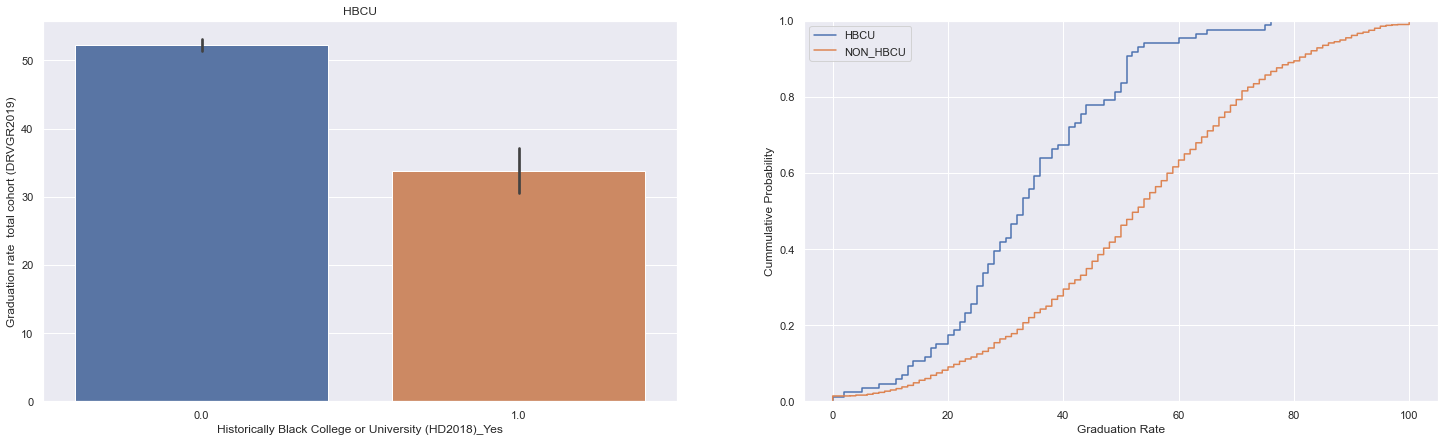

In [192]:
fig, ax = plt.subplots(1,2,figsize=(25,7))

_ = sns.barplot(data=highly_important_df, x=names[18], y=names[-1], ax=ax[0])
_ = ax[0].set_title("HBCU")

_ = sns.ecdfplot(x=hbcu_arr, label="HBCU", ax=ax[1])
plt.legend()

_ = sns.ecdfplot(x=non_arr, label="NON_HBCU", ax=ax[1])

ax[1].set_xlabel("Graduation Rate")
ax[1].set_ylabel("Cummulative Probability")
plt.legend()

plt.show()

### By State

In [185]:
penn = highly_important_df[highly_important_df[names[-4]] == 1]
penn_arr = penn[names[-1]].to_numpy()

georgia = highly_important_df[highly_important_df[names[-5]] == 1]
georgia_arr = georgia[names[-1]].to_numpy()

california = highly_important_df[highly_important_df[names[-6]] == 1]
cali_arr = california[names[-1]].to_numpy()



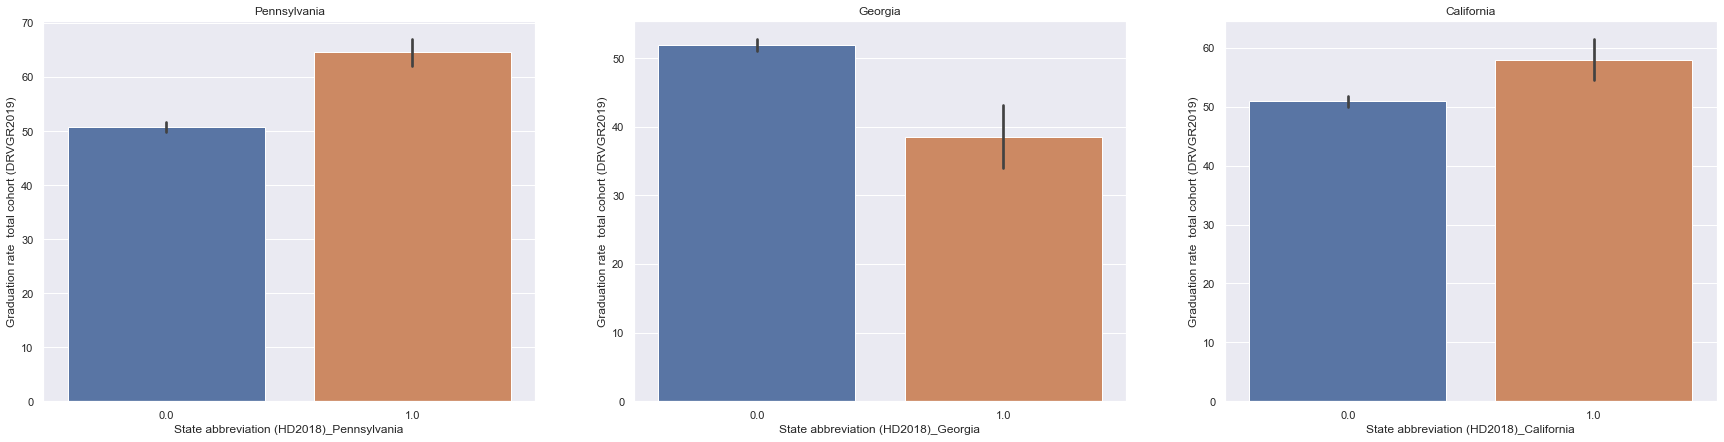

In [136]:
fig, ax = plt.subplots(1,3, figsize=(30,7))

_ = sns.barplot(data=highly_important_df, x=names[-4], y=names[-1], ax=ax[0])
_ = ax[0].set_title("Pennsylvania")

_ = sns.barplot(data=highly_important_df, x=names[-5], y=names[-1], ax=ax[1])
_ = ax[1].set_title("Georgia")

_ = sns.barplot(data=highly_important_df, x=names[-6], y=names[-1], ax=ax[2])
_ = ax[2].set_title("California")


In [264]:
replicate_samples = sample_replicate(penn_arr, georgia_arr, diff_of_means, 10000)
ci95 = np.percentile(replicate_samples, [2.5, 97.5])
empiricle_difference = diff_of_means(penn_arr, georgia_arr)
penn_georgia_pvalue = get_p(replicate_samples, empiricle_difference, False)

In [265]:
ci95

array([-6.27615741,  6.11527778])

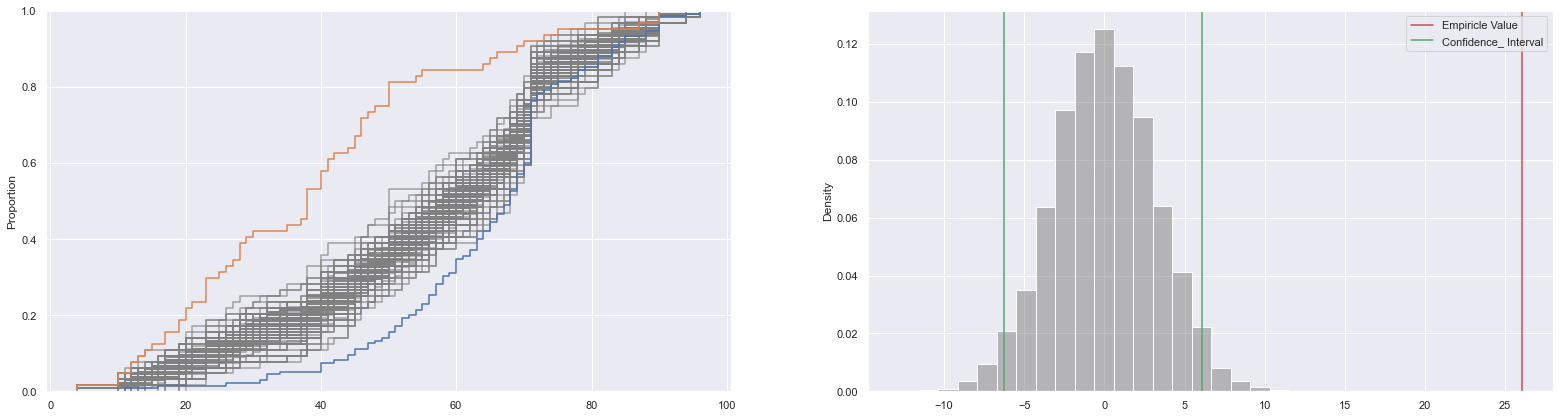

In [276]:
fig, ax = plt.subplots(1,2, figsize=(27,7))
#_ = sns.ecdfplot(x=penn_arr, label="Pennsylvania", color="gray")

plot_permutations(penn_arr, georgia_arr, 100, "Pennsylvania", "Georgia", ax=ax[0])
_ = sns.histplot(x=replicate_samples, bins=20, ax=ax[1], stat='density', color='gray',alpha=0.5)
_ = ax[1].axvline(x=empiricle_difference, color='r', label="Empiricle Value")
_ = ax[1].axvline(x=ci95[0], color='g', label="Confidence_ Interval")
_ = ax[1].axvline(x=ci95[1], color='g')
ax[1].legend()
#_ = sns.ecdfplot(x=georgia_arr, label="Georgia")

### Actual Difference Between Pennsylvania and Georgia

In [243]:
empiricle_difference

26.038310185185182

### Feature Engineering Ideas

<ol>
    <li>Binning continuous variables</li>
    <ul>
        <li>Grant Aid</li>
        <li>Staff Diversity</li>
        <li>Expenses</li>
    </ul>
    <li>create state wranking as ordinal</li>
</ol>